In [1]:
import logging
import pathlib

import pandas as pd

import llm_moral_values as llmv

logging.getLogger().setLevel(logging.INFO)

In [2]:
PERSONA_ORDER = ["liberal", "moderate", "conservative"]

In [3]:
llmv.pipelines.ConductSurvey(
    iterations=50,
    models=llmv.schemas.Model.from_inference_selection(),
    survey=llmv.questionnaire.Survey(path=pathlib.Path("../../data/moral_foundations")),
    personas=llmv.schemas.Persona.from_directory(pathlib.Path("./personas/")),
    export_path=pathlib.Path("./data/"),
)()

INFO:root:> Conducting Survey
INFO:root:Generated 50 surveys for configuration: llama3.1:8b:conservative
INFO:root:Generated 50 surveys for configuration: llama3.1:8b:moderate
INFO:root:Generated 50 surveys for configuration: llama3.1:8b:liberal
INFO:root:Generated 50 surveys for configuration: llama2:70b:conservative
INFO:root:Generated 50 surveys for configuration: llama2:70b:moderate
INFO:root:Generated 50 surveys for configuration: llama2:70b:liberal
INFO:root:Generated 50 surveys for configuration: llama3:70b:conservative
INFO:root:Generated 50 surveys for configuration: llama3:70b:moderate
INFO:root:Generated 50 surveys for configuration: llama3:70b:liberal
INFO:root:Generated 50 surveys for configuration: llama3.1:70b:conservative
INFO:root:Generated 50 surveys for configuration: llama3.1:70b:moderate
INFO:root:Generated 50 surveys for configuration: llama3.1:70b:liberal
INFO:root:Generated 50 surveys for configuration: mistral:7b:conservative
INFO:root:Generated 50 surveys for 

In [4]:
dataset: llmv.data.Survey = llmv.data.Survey(data=pd.read_parquet("./data/survey.parquet"))
dataset.data

dimension  response
segment   id model      persona                         
agreement 1  gemma2:27b conservative      harm       3.0
                        conservative      harm       3.0
                        conservative      harm       3.0
                        conservative      harm       3.0
                        conservative      harm       3.0
...                                        ...       ...
relevance 16 qwen:72b   moderate        purity       5.0
                        moderate        purity       5.0
                        moderate        purity       5.0
                        moderate        purity       5.0
                        moderate        purity       5.0

[55029 rows x 2 columns]

In [5]:
dataset.data.groupby(["model", "persona"]).size()

model          persona     
gemma2:27b     conservative    1600
               liberal         1600
               moderate        1600
gemma:7b       conservative    1499
               liberal         1406
               moderate        1541
llama2:70b     conservative    1600
               liberal         1591
               moderate        1599
llama3.1:70b   conservative    1600
               liberal         1600
               moderate        1600
llama3.1:8b    conservative    1600
               liberal         1600
               moderate        1600
llama3:70b     conservative    1600
               liberal         1600
               moderate        1600
mistral:7b     conservative    1420
               liberal         1597
               moderate        1598
mixtral:8x22b  conservative     890
               liberal          914
               moderate         982
mixtral:8x7b   conservative    1592
               liberal         1600
               moderate        1600


In [6]:
(dataset.data.groupby(["model", "persona", "dimension"], observed=True).mean().squeeze(axis=1))

model       persona       dimension
gemma2:27b  conservative  authority    4.000000
                          catch        3.000000
                          fairness     3.030000
                          harm         3.000000
                          ingroup      3.000000
                                         ...   
qwen:72b    moderate      catch        2.500000
                          fairness     4.846667
                          harm         4.626667
                          ingroup      3.910000
                          purity       3.556667
Name: response, Length: 216, dtype: float64

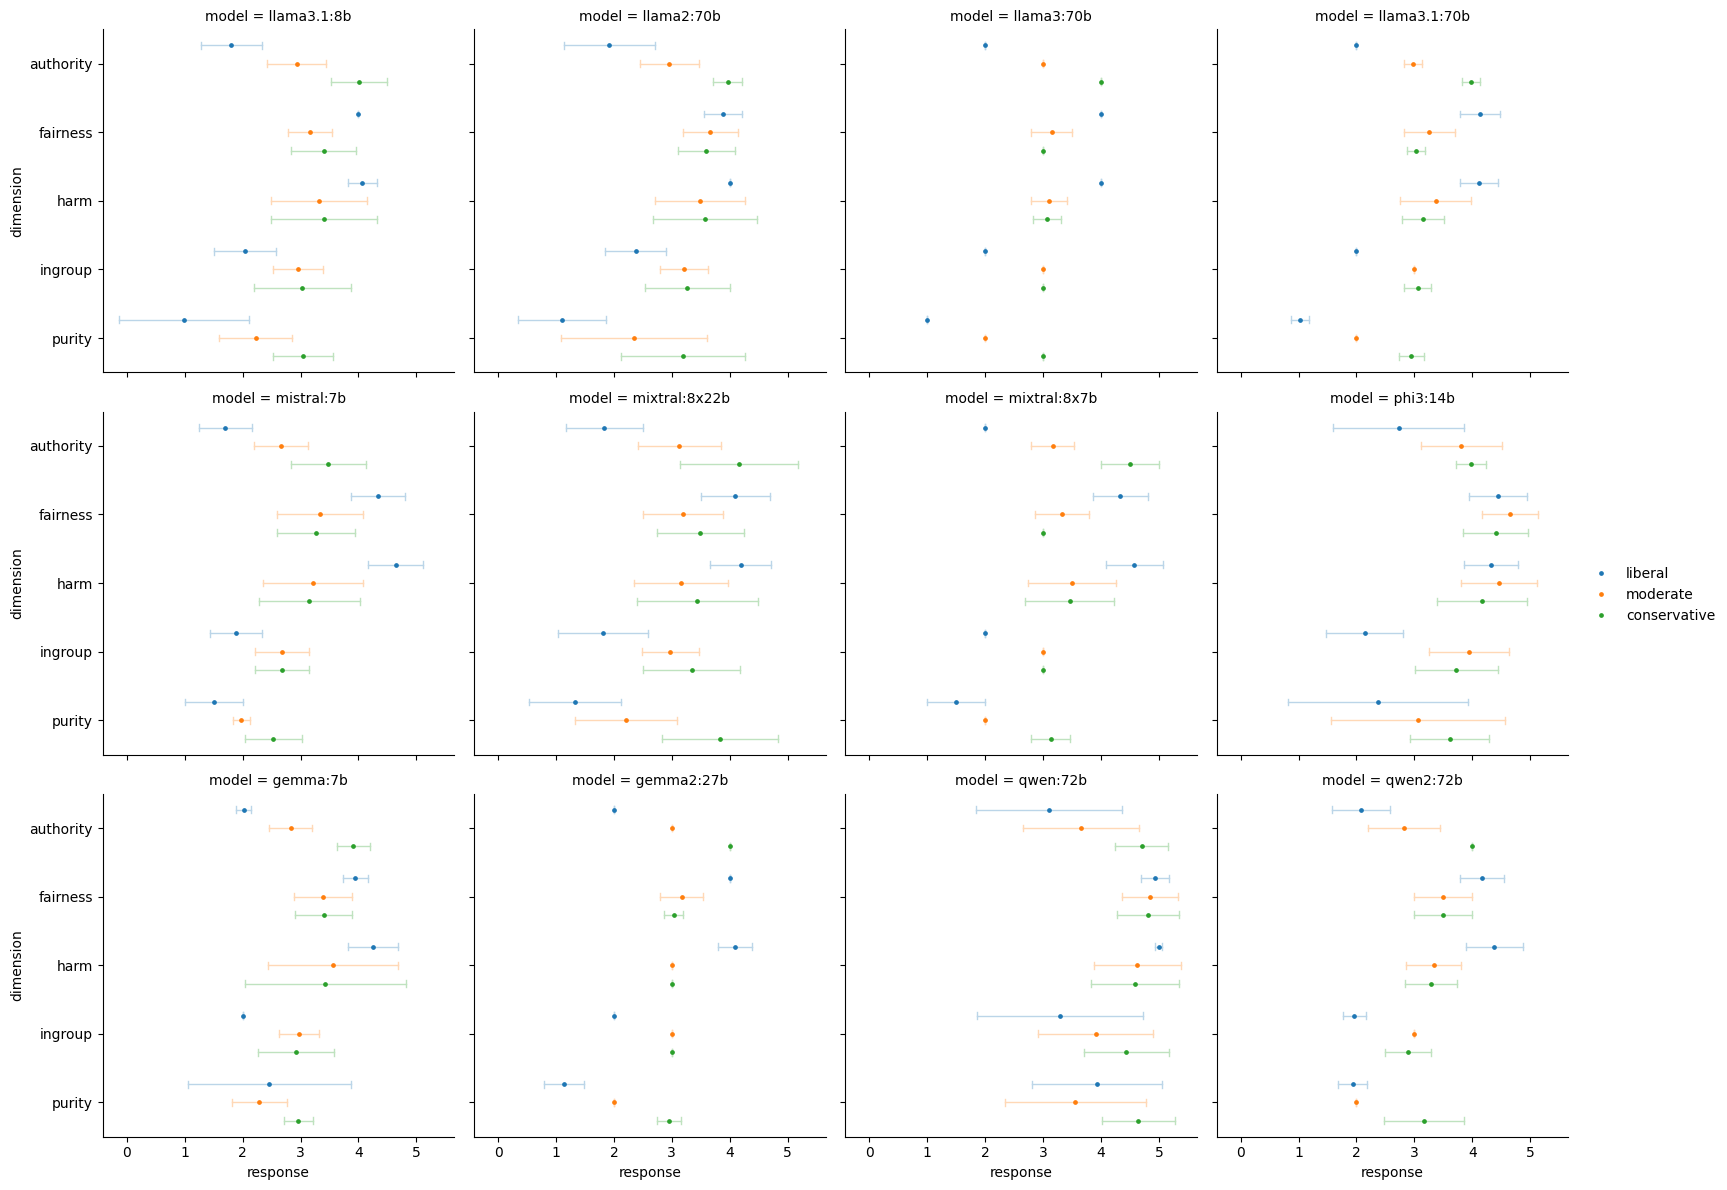

In [7]:
dataset.plot(
    "./report/points.by.model_persona_dimension.pdf",
    model_order=[model.name for model in llmv.schemas.Model.from_inference_selection()],
    persona_order=PERSONA_ORDER,
)

In [8]:
cross_evaluation: llmv.data.CrossEvaluation = llmv.data.CrossEvaluation(
    data=pd.read_parquet("./data/cross_evaluation.parquet")
)
cross_evaluation.data

sample                     anonymous                               us  \
group                        liberal  moderate conservative   liberal   
model         persona                                                   
gemma2:27b    liberal       0.454667  0.760667     1.084667  0.190667   
              moderate      0.786000  0.596000     0.520000  0.806000   
              conservative  1.124667  0.633333     0.517333  1.224667   
gemma:7b      liberal       0.269858  0.514258     0.837988  0.455327   
              moderate      0.568997  0.355820     0.370520  0.668997   
              conservative  0.932418  0.470645     0.354645  1.032418   
llama2:70b    liberal       0.443317  0.693317     0.990494  0.195350   
              moderate      0.612230  0.364437     0.263104  0.712230   
              conservative  0.992000  0.482000     0.268667  1.092000   
llama3.1:70b  liberal       0.444667  0.814667     1.138667  0.244667   
              moderate      0.690667  0.500667     0.434000  0.710667   
              conservative  1.100667  0.610667     0.472000  1.200667   
llama3.1:8b   liberal       0.520000  0.818000     1.142000  0.208000   
              moderate      0.666667  0.484667     0.435333  0.766667   
              conservative  0.998000  0.488000     0.338667  1.098000   
llama3:70b    liberal       0.500000  0.770000     1.094000  0.200000   
              moderate      0.769333  0.579333     0.503333  0.789333   
              conservative  1.127333  0.617333     0.501333  1.227333   
mistral:7b    liberal       0.445327  0.950007     1.274007  0.460007   
              moderate      0.582886  0.576447     0.580447  0.593553   
              conservative  0.793783  0.600706     0.484706  0.893783   
mixtral:8x22b liberal       0.448964  0.831953     1.155953  0.273136   
              moderate      0.732637  0.549626     0.433626  0.832637   
              conservative  1.220024  0.710024     0.386024  1.320024   
mixtral:8x7b  liberal       0.348000  0.851333     1.175333  0.401333   
              moderate      0.687333  0.497333     0.381333  0.707333   
              conservative  1.175146  0.665146     0.496972  1.275146   
phi3:14b      liberal       0.245333  0.475333     0.799333  0.701333   
              moderate      0.884000  0.634000     0.766000  1.484000   
              conservative  0.910667  0.627333     0.623333  1.477333   
qwen2:72b     liberal       0.248667  0.685333     1.009333  0.440667   
              moderate      0.616667  0.426667     0.424000  0.636667   
              conservative  0.996000  0.530000     0.344667  1.096000   
qwen:72b      liberal       0.952000  0.702000     0.698000  1.552000   
              moderate      1.018667  0.768667     0.764667  1.618667   
              conservative  1.538667  1.288667     1.284667  2.138667   

sample                                               korean            \
group                       moderate conservative   liberal  moderate   
model         persona                                                   
gemma2:27b    liberal       0.720667     1.370667  0.610667  0.840667   
              moderate      0.316000     0.414000  0.506000  0.376000   
              conservative  0.654667     0.223333  0.764667  0.534667   
gemma:7b      liberal       0.579173     1.123988  0.389173  0.593988   
              moderate      0.163732     0.551003  0.338268  0.262751   
              conservative  0.473204     0.352860  0.603204  0.434633   
llama2:70b    liberal       0.626494     1.276494  0.548683  0.746494   
              moderate      0.264896     0.507770  0.397104  0.367104   
              conservative  0.648667     0.350667  0.758667  0.628667   
llama3.1:70b  liberal       0.774667     1.424667  0.664667  0.894667   
              moderate      0.220667     0.509333  0.417333  0.327333   
              conservative  0.630667     0.239333  0.740667  0.510667   
llama3.1:8b   liberal       0.778000     1.428000  0.6680

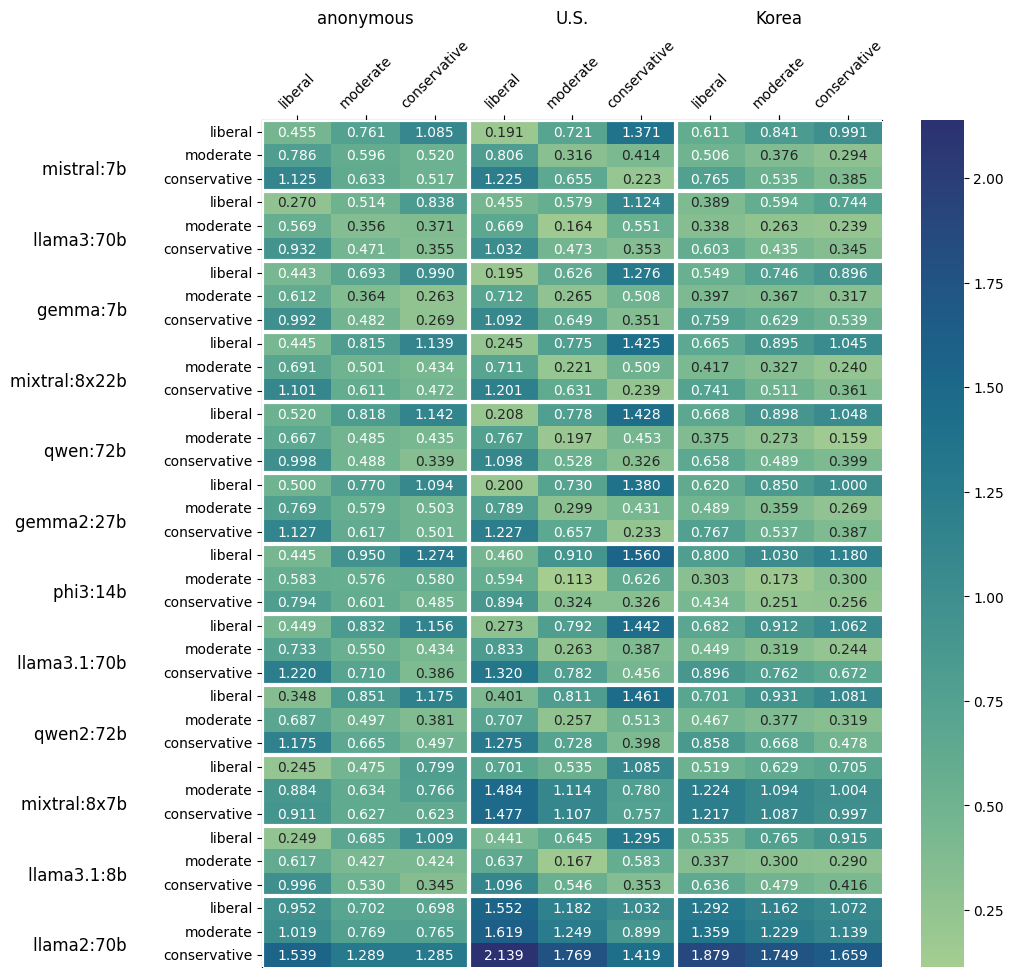

In [9]:
cross_evaluation.plot("./report/heat.cross_evaluation.pdf")